<a href="https://colab.research.google.com/github/Gustavo-Nogueira-Lima/Projeto-de-Analise-Estatistica-com-Python/blob/main/Desafio_Estat%C3%ADstica_com_Python_Escola_DNC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Análise Estatística de Salários em Dados

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 1. Importação e Exploração Inicial
# ============================

# Carregar o dataset
df = pd.read_csv("/content/drive/MyDrive/salario_profissionais_dados.csv")

Informações gerais do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   work_year            3755 non-null   int64 
 1   country              3755 non-null   object
 2   region               3755 non-null   object
 3   experience_level     3755 non-null   object
 4   job_title            3755 non-null   object
 5   salary_in_usd        3755 non-null   int64 
 6   employee_residence   3755 non-null   object
 7   company_location     3755 non-null   object
 8   company_size         3755 non-null   object
 9   years_of_experience  3755 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 293.5+ KB
None

Dimensões do dataset: (3755, 10)

Primeiras linhas:
   work_year                   country    region experience_level  \
0       2023                     Spain    Europe               SE   
1       2023  United State

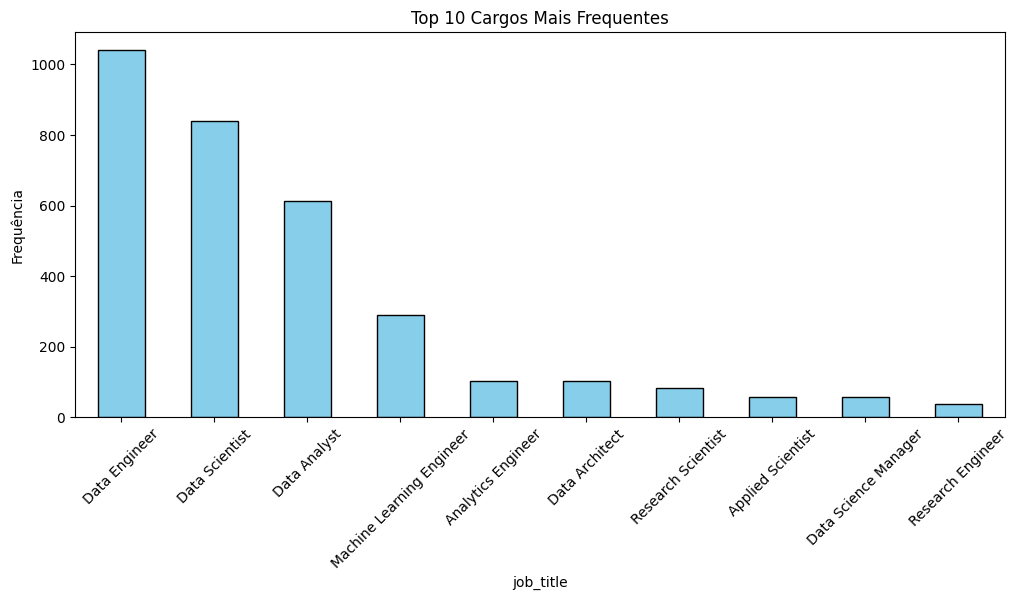


Top 10 Países Mais Frequentes:
country
United States of America                                3004
United Kingdom of Great Britain and Northern Ireland     167
Canada                                                    85
Spain                                                     80
India                                                     71
Germany                                                   48
France                                                    38
Portugal                                                  18
Brazil                                                    18
Greece                                                    16
Name: count, dtype: int64


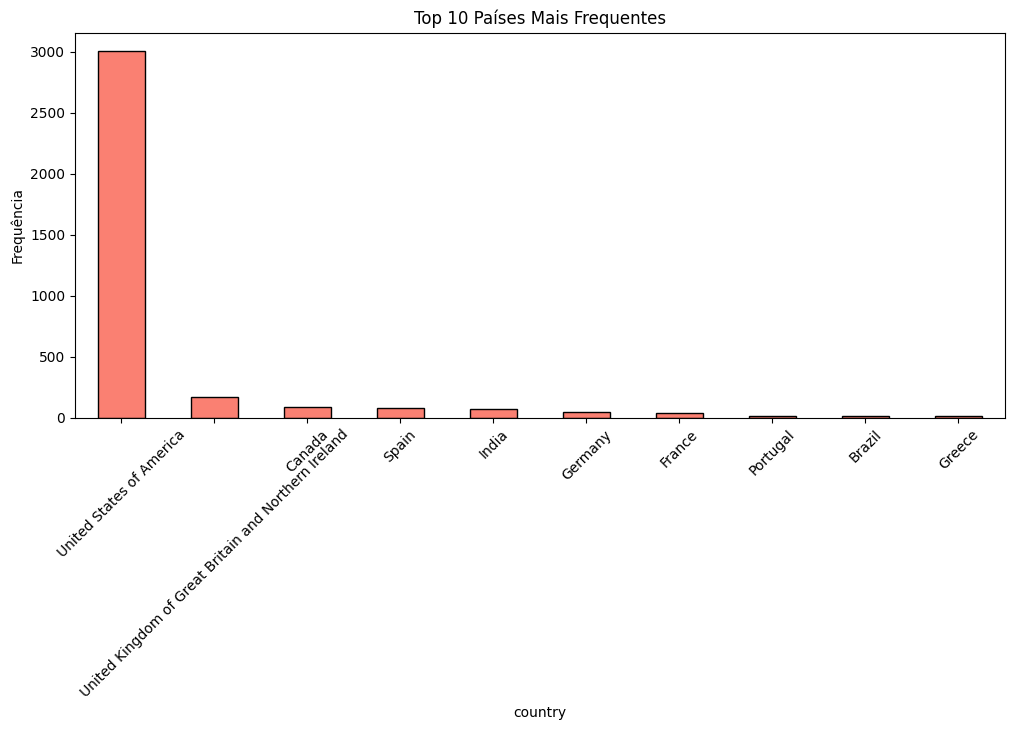


Distribuição por Nível de Experiência:
experience_level
SE    2516
MI     805
EN     320
EX     114
Name: count, dtype: int64


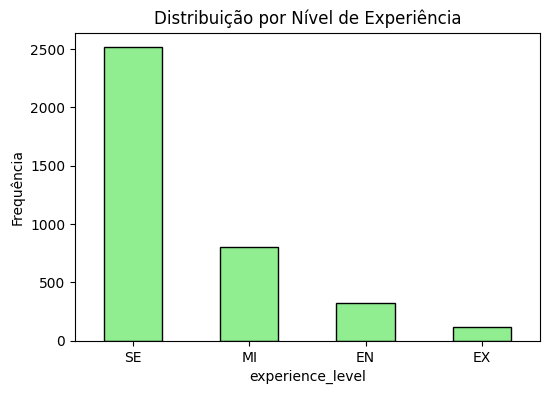


📊 Estatísticas Descritivas - Salário:
count      3755.000000
mean     137570.389880
std       63055.625278
min        5132.000000
25%       95000.000000
50%      135000.000000
75%      175000.000000
max      450000.000000
Name: salary_in_usd, dtype: float64


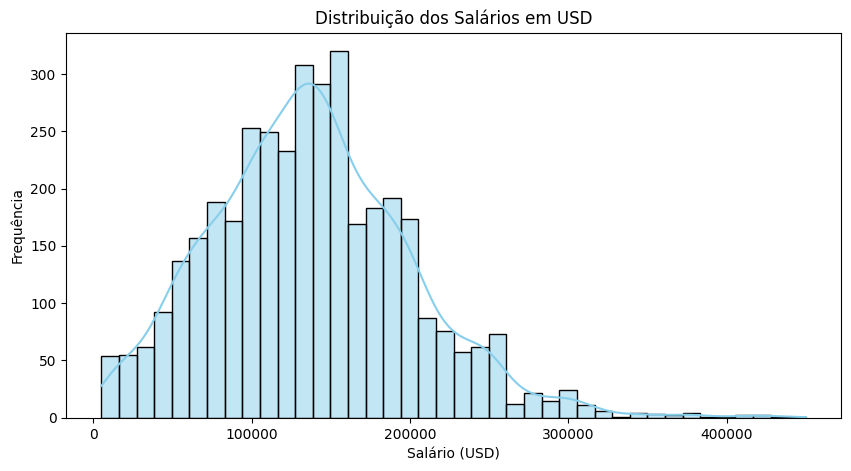

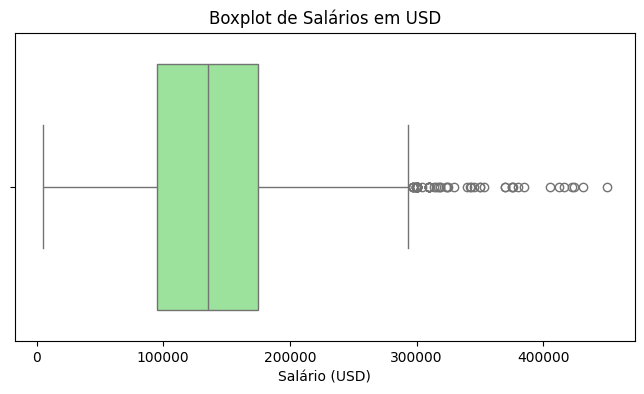


Salário médio por cargo:
job_title
Data Science Tech Lead                375000.000000
Cloud Data Architect                  250000.000000
Data Lead                             212500.000000
Data Analytics Lead                   211254.500000
Principal Data Scientist              198171.125000
Director of Data Science              195140.727273
Principal Data Engineer               192500.000000
Machine Learning Software Engineer    192420.000000
Data Science Manager                  191278.775862
Applied Scientist                     190264.482759
Name: salary_in_usd, dtype: float64

Salário médio por país:
country
Israel                      423834.000000
Malaysia                    200000.000000
Puerto Rico                 166000.000000
United States of America    152822.011651
Canada                      132222.905882
China                       125404.000000
New Zealand                 125000.000000
Bosnia and Herzegovina      120000.000000
Ireland                     114943.4285

In [ ]:
# Exploração inicial
print("Informações gerais do dataset:")
print(df.info())
print("\nDimensões do dataset:", df.shape)
print("\nPrimeiras linhas:")
print(df.head())
print("\nValores nulos:")
print(df.isnull().sum())

# ============================
# 2. Análises Categóricas
# ============================

# Top 10 cargos mais frequentes
job_counts = df['job_title'].value_counts().head(10)
print("\nTop 10 Cargos Mais Frequentes:")
print(job_counts)

plt.figure(figsize=(12,5))
job_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Top 10 Cargos Mais Frequentes")
plt.ylabel("Frequência")
plt.xticks(rotation=45)
plt.show()

# Top 10 países mais frequentes
country_counts = df['country'].value_counts().head(10)
print("\nTop 10 Países Mais Frequentes:")
print(country_counts)

plt.figure(figsize=(12,5))
country_counts.plot(kind='bar', color='salmon', edgecolor='black')
plt.title("Top 10 Países Mais Frequentes")
plt.ylabel("Frequência")
plt.xticks(rotation=45)
plt.show()

# Distribuição por nível de experiência
exp_counts = df['experience_level'].value_counts()
print("\nDistribuição por Nível de Experiência:")
print(exp_counts)

plt.figure(figsize=(6,4))
exp_counts.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title("Distribuição por Nível de Experiência")
plt.ylabel("Frequência")
plt.xticks(rotation=0)
plt.show()

# ============================
# 3. Estatísticas Descritivas de Salários
# ============================

print("\n📊 Estatísticas Descritivas - Salário:")
print(df['salary_in_usd'].describe())

# Histograma de salários
plt.figure(figsize=(10,5))
sns.histplot(df['salary_in_usd'], bins=40, kde=True, color="skyblue")
plt.title("Distribuição dos Salários em USD")
plt.xlabel("Salário (USD)")
plt.ylabel("Frequência")
plt.show()

# Boxplot de salários
plt.figure(figsize=(8,4))
sns.boxplot(x=df['salary_in_usd'], color="lightgreen")
plt.title("Boxplot de Salários em USD")
plt.xlabel("Salário (USD)")
plt.show()

# ============================
# 4. Estatísticas Segmentadas
# ============================

# Salário médio por cargo
print("\nSalário médio por cargo:")
print(df.groupby("job_title")["salary_in_usd"].mean().sort_values(ascending=False).head(10))

# Salário médio por país
print("\nSalário médio por país:")
print(df.groupby("country")["salary_in_usd"].mean().sort_values(ascending=False).head(10))

# Salário médio por nível de experiência
print("\nSalário médio por nível de experiência:")
print(df.groupby("experience_level")["salary_in_usd"].mean().sort_values(ascending=False))



📊 Matriz de Correlação:
                     salary_in_usd  work_year  years_of_experience
salary_in_usd             1.000000   0.228290             0.410723
work_year                 0.228290   1.000000             0.178878
years_of_experience       0.410723   0.178878             1.000000


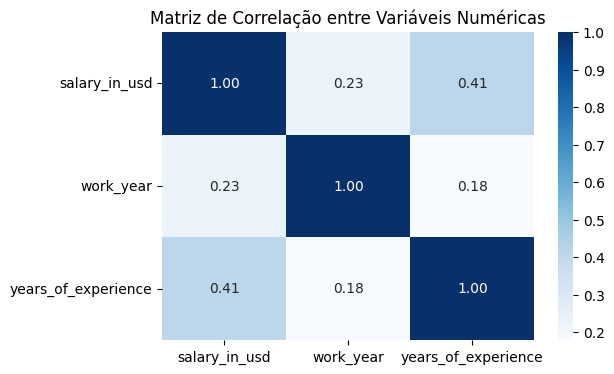

In [ ]:
# ============================
# 5. Matriz de Correlação
# ============================

# Seleção de variáveis numéricas
numeric_cols = ["salary_in_usd", "work_year", "years_of_experience"]
correlation_matrix = df[numeric_cols].corr()

print("\n📊 Matriz de Correlação:")
print(correlation_matrix)

plt.figure(figsize=(6,4))
sns.heatmap(correlation_matrix, annot=True, cmap="Blues", fmt=".2f")
plt.title("Matriz de Correlação entre Variáveis Numéricas")
plt.show()

In [ ]:
# Insights identificados:
# - Coeficientes próximos de 1 ou -1 indicam forte correlação.
# - salary_in_usd vs years_of_experience → esperado correlação positiva (quanto mais experiência, maior salário).
# - salary_in_usd vs work_year → pode indicar tendência de crescimento dos salários ao longo do tempo.